This is my AI only assignment!

Here are the prompts used:
"I need you to build an entire python notebook, here's the qualifications:

Import libraries-pandas,seaborn, matplotlib.pyplot, plotly.express, and from sklearn: train_test_split,StandardScaler, KNeighborsClassifier, confusion_matrix, classification_report, accuracy_score,precision_score,recall_score, and f1_score

That can all be in one cell, after this we need to load the credit card data from a file called"card_transdata.csv" and look at the head,shape, info, and get a describe command of the data.

Then check for missing values using isnull() and sum(). Then drop rows with null values and look at the shape again as well as the head"

"With this new cleaned data frame we now need to:

make a countplot of the row fraud with the title being 'Fraud Class Distribution'

do the same for the row used_pin_number and the title 'Used Pin Distribution'
and for repeat_retailer with the title 'Repeat Retailer Distribution'
and for used_chip with the title 'Used Chip Distribution'

Then make a histplot using the row 'distance_from_last_transaction' with 30 bins and the title 'Distance From Last Transaction Distribution'
and another histplot with the row 'ratio_to_median_purchase_price' also 30 bins and the title 'Ratio to Median Purchase Price Distribution'"

"Now make a countplot with 'used_pin_number' a hue = fraud and palette ['green','red']
and make the title 'Transactions with PIN vs Fraudulent Transactions', xlabel 'Used PIN', ylabel 'count', and legend with title fraud and labels ['Non-Fraudulent','Fraudulent']"

"Now can you make an X without the fraud column and y with only the fraud column from our dataframe then make a split with values X_train, X_test, y_train, y_test with a test size of 0.2 random state 42 and stratify by y and show the test data set along with a count of the transactions in the testing set"

"Make a no fraud model with the equation [0] * len(y_test) and then print the first 100 rows"

"Now make a KNeighborsClassirfier with 3 nearest neighbors, fit to the train, predict on the X_test and print the first 100 rows of the predictions
"

"Now make a confusion matrix from the no fraud data frame with a heatmap using  annot=True, fmt='d', cmap='Reds', cbar=True and then title it Confusion Matrix - Never Fraud Model and x label predicted and y label actual and print a classification report on it"

"Now use a singular bar chart to compare the knn and no fraud with accuracy, precision, recall, f1_score with knn being blue and no fraud red and label well"

In [2]:
# Cell 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Cell 2: Load and explore the data
# Load the dataset
df = pd.read_csv('card_transdata.csv')

# Display the first few rows
df_head = df.head()

# Display the shape, info, and describe of the dataset
df_shape = df.shape
df_info = df.info()
df_describe = df.describe()

# Display output for inspection
df_head, df_shape, df_info, df_describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              999 non-null    float64
 1   distance_from_last_transaction  996 non-null    float64
 2   ratio_to_median_purchase_price  997 non-null    float64
 3   repeat_retailer                 992 non-null    float64
 4   used_chip                       995 non-null    float64
 5   used_pin_number                 997 non-null    float64
 6   online_order                    995 non-null    float64
 7   fraud                           999 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


(   distance_from_home  distance_from_last_transaction  \
 0           57.877857                        0.311140   
 1           10.829943                        0.175592   
 2            5.091079                             NaN   
 3            2.247564                        5.600044   
 4           44.190936                        0.566486   
 
    ratio_to_median_purchase_price  repeat_retailer  used_chip  \
 0                        1.945940              1.0        1.0   
 1                        1.294219              1.0        NaN   
 2                        0.427715              1.0        0.0   
 3                        0.362663              1.0        1.0   
 4                        2.222767              1.0        1.0   
 
    used_pin_number  online_order  fraud  
 0              0.0           0.0      0  
 1              0.0           0.0      0  
 2              0.0           1.0      0  
 3              0.0           1.0      0  
 4              0.0           1.0    

In [3]:
# Cell 3: Check for missing values and clean the data

# Check for missing values
missing_values = df.isnull().sum()

# Drop rows with missing values
df_cleaned = df.dropna()

# Display the shape of the cleaned data and the first few rows
df_cleaned_shape = df_cleaned.shape
df_cleaned_head = df_cleaned.head()

missing_values, df_cleaned_shape, df_cleaned_head


(distance_from_home                0
 distance_from_last_transaction    3
 ratio_to_median_purchase_price    2
 repeat_retailer                   7
 used_chip                         4
 used_pin_number                   2
 online_order                      4
 fraud                             0
 dtype: int64,
 (977, 8),
    distance_from_home  distance_from_last_transaction  \
 0           57.877857                        0.311140   
 3            2.247564                        5.600044   
 4           44.190936                        0.566486   
 5            5.586408                       13.261073   
 6            3.724019                        0.956838   
 
    ratio_to_median_purchase_price  repeat_retailer  used_chip  \
 0                        1.945940              1.0        1.0   
 3                        0.362663              1.0        1.0   
 4                        2.222767              1.0        1.0   
 5                        0.064768              1.0        0.0  

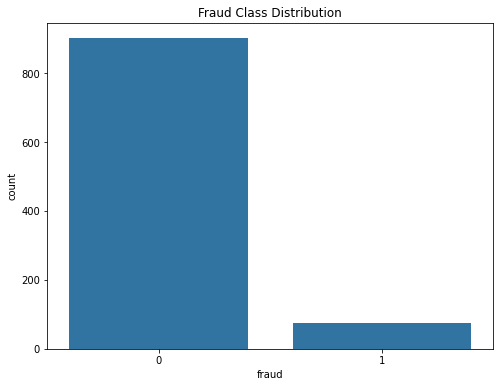

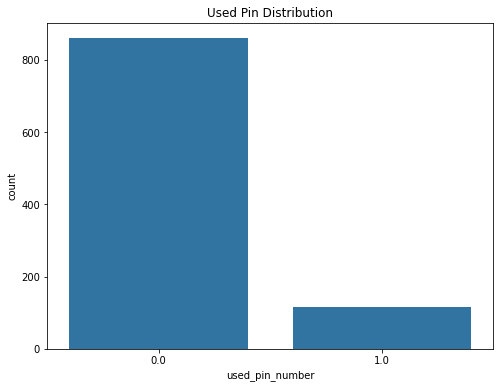

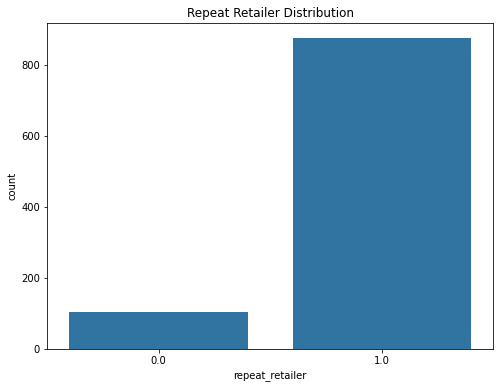

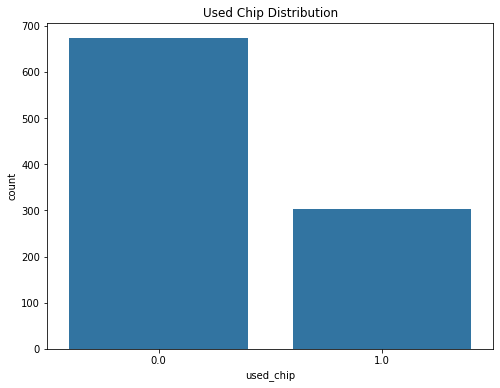

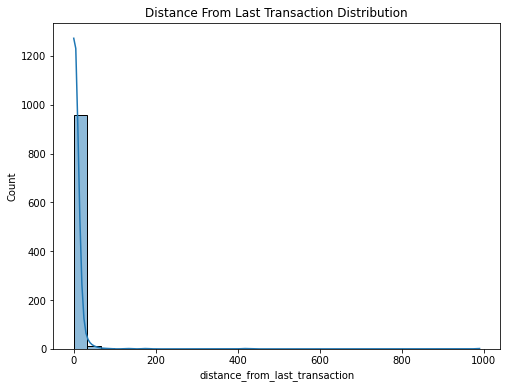

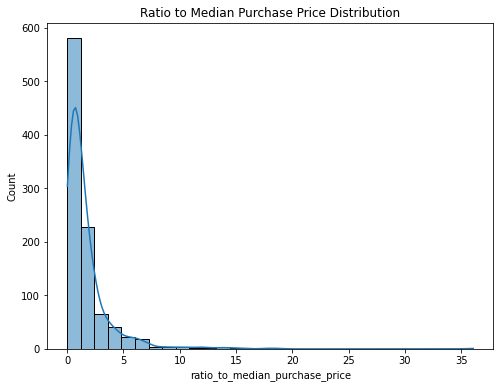

In [4]:
# Cell 4: Visualizations

# Create a countplot for 'fraud' class distribution
plt.figure(figsize=(8,6))
sns.countplot(x='fraud', data=df_cleaned)
plt.title('Fraud Class Distribution')
plt.show()

# Create a countplot for 'used_pin_number' distribution
plt.figure(figsize=(8,6))
sns.countplot(x='used_pin_number', data=df_cleaned)
plt.title('Used Pin Distribution')
plt.show()

# Create a countplot for 'repeat_retailer' distribution
plt.figure(figsize=(8,6))
sns.countplot(x='repeat_retailer', data=df_cleaned)
plt.title('Repeat Retailer Distribution')
plt.show()

# Create a countplot for 'used_chip' distribution
plt.figure(figsize=(8,6))
sns.countplot(x='used_chip', data=df_cleaned)
plt.title('Used Chip Distribution')
plt.show()

# Create a histplot for 'distance_from_last_transaction' with 30 bins
plt.figure(figsize=(8,6))
sns.histplot(df_cleaned['distance_from_last_transaction'], bins=30, kde=True)
plt.title('Distance From Last Transaction Distribution')
plt.show()

# Create a histplot for 'ratio_to_median_purchase_price' with 30 bins
plt.figure(figsize=(8,6))
sns.histplot(df_cleaned['ratio_to_median_purchase_price'], bins=30, kde=True)
plt.title('Ratio to Median Purchase Price Distribution')
plt.show()


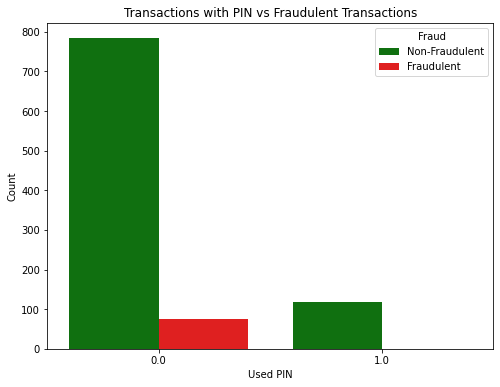

In [5]:
# Cell 5: Countplot with 'used_pin_number' and 'fraud' as hue

plt.figure(figsize=(8,6))

# Create countplot with hue 'fraud' and a custom color palette
sns.countplot(x='used_pin_number', data=df_cleaned, hue='fraud', palette=['green', 'red'])

# Set the title and labels
plt.title('Transactions with PIN vs Fraudulent Transactions')
plt.xlabel('Used PIN')
plt.ylabel('Count')

# Customize the legend
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Show the plot
plt.show()


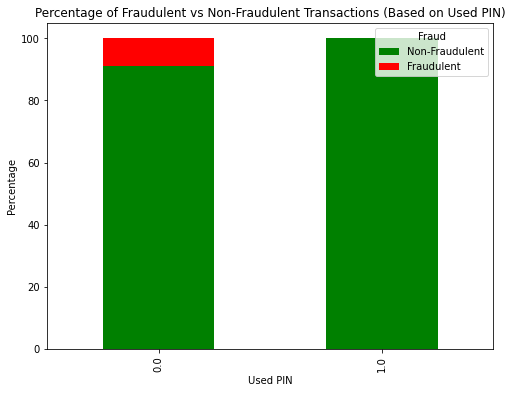

In [6]:
# Cell 7: Stacked barplot for fraudulent vs non-fraudulent transactions based on PIN usage

# Group the data by 'used_pin_number' and 'fraud', then normalize it
fraud_pivot = df_cleaned.groupby(['used_pin_number', 'fraud']).size().unstack(fill_value=0)
fraud_pivot_normalized = fraud_pivot.div(fraud_pivot.sum(axis=1), axis=0) * 100  # Normalize to percentage

# Plotting the stacked barplot
ax = fraud_pivot_normalized.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8,6))

# Set the title and labels
ax.set_title('Percentage of Fraudulent vs Non-Fraudulent Transactions (Based on Used PIN)')
ax.set_xlabel('Used PIN')
ax.set_ylabel('Percentage')

# Set custom legend
ax.legend(['Non-Fraudulent', 'Fraudulent'], title='Fraud')

# Show the plot
plt.show()


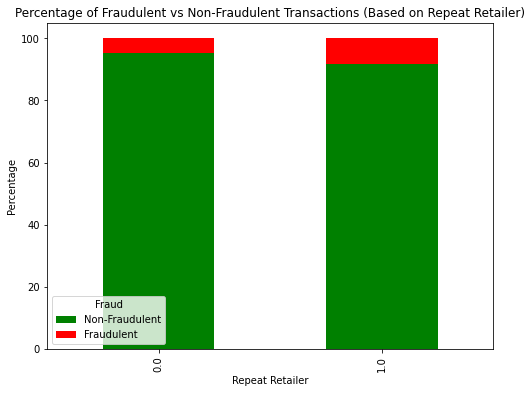

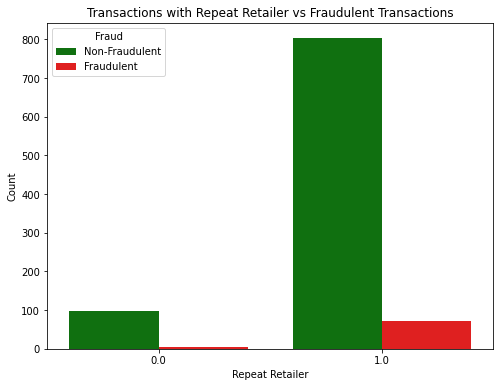

In [7]:
# Cell 8: Stacked barplot for fraudulent vs non-fraudulent transactions based on Repeat Retailer

# Group the data by 'repeat_retailer' and 'fraud', then normalize it
fraud_pivot_repeat_retailer = df_cleaned.groupby(['repeat_retailer', 'fraud']).size().unstack(fill_value=0)
fraud_pivot_repeat_retailer_normalized = fraud_pivot_repeat_retailer.div(fraud_pivot_repeat_retailer.sum(axis=1), axis=0) * 100  # Normalize to percentage

# Plotting the stacked barplot
ax = fraud_pivot_repeat_retailer_normalized.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8,6))

# Set the title and labels
ax.set_title('Percentage of Fraudulent vs Non-Fraudulent Transactions (Based on Repeat Retailer)')
ax.set_xlabel('Repeat Retailer')
ax.set_ylabel('Percentage')

# Set custom legend
ax.legend(['Non-Fraudulent', 'Fraudulent'], title='Fraud')

# Show the plot
plt.show()

# Cell 9: Countplot with 'repeat_retailer' and 'fraud' as hue

plt.figure(figsize=(8,6))

# Create countplot with hue 'fraud' and a custom color palette
sns.countplot(x='repeat_retailer', data=df_cleaned, hue='fraud', palette=['green', 'red'])

# Set the title and labels
plt.title('Transactions with Repeat Retailer vs Fraudulent Transactions')
plt.xlabel('Repeat Retailer')
plt.ylabel('Count')

# Customize the legend
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Show the plot
plt.show()


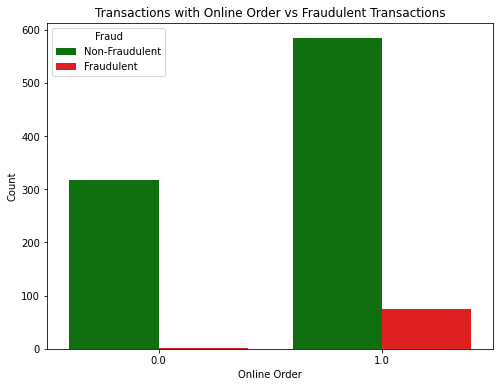

In [8]:
# Cell 10: Countplot with 'online_order' and 'fraud' as hue

plt.figure(figsize=(8,6))

# Create countplot with hue 'fraud' and a custom color palette
sns.countplot(x='online_order', data=df_cleaned, hue='fraud', palette=['green', 'red'])

# Set the title and labels
plt.title('Transactions with Online Order vs Fraudulent Transactions')
plt.xlabel('Online Order')
plt.ylabel('Count')

# Customize the legend
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Show the plot
plt.show()


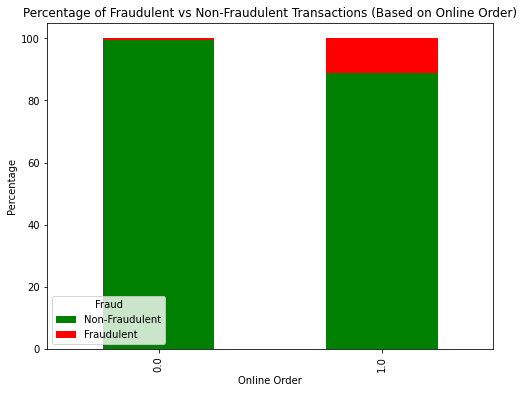

In [9]:
# Cell 11: Stacked barplot for fraudulent vs non-fraudulent transactions based on Online Order

# Group the data by 'online_order' and 'fraud', then normalize it
fraud_pivot_online_order = df_cleaned.groupby(['online_order', 'fraud']).size().unstack(fill_value=0)
fraud_pivot_online_order_normalized = fraud_pivot_online_order.div(fraud_pivot_online_order.sum(axis=1), axis=0) * 100  # Normalize to percentage

# Plotting the stacked barplot
ax = fraud_pivot_online_order_normalized.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8,6))

# Set the title and labels
ax.set_title('Percentage of Fraudulent vs Non-Fraudulent Transactions (Based on Online Order)')
ax.set_xlabel('Online Order')
ax.set_ylabel('Percentage')

# Set custom legend
ax.legend(['Non-Fraudulent', 'Fraudulent'], title='Fraud')

# Show the plot
plt.show()


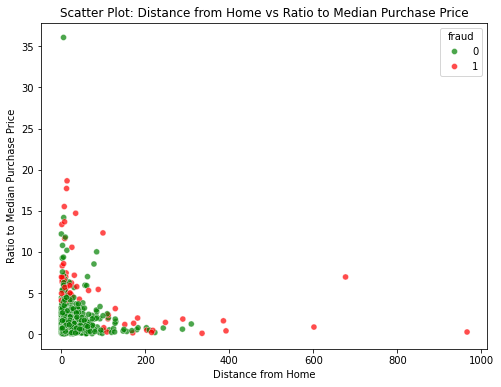

In [10]:
# Cell 14: Scatter plot with 'fraud' as hue and custom palette for 'distance_from_home' vs 'ratio_to_median_purchase_price'

plt.figure(figsize=(8,6))

# Create the scatter plot with 'fraud' as hue and custom palette
sns.scatterplot(x='distance_from_home', 
                y='ratio_to_median_purchase_price', 
                hue='fraud', 
                data=df_cleaned, 
                palette={0: 'green', 1: 'red'}, 
                alpha=0.7)

# Set the title and labels
plt.title('Scatter Plot: Distance from Home vs Ratio to Median Purchase Price')
plt.xlabel('Distance from Home')
plt.ylabel('Ratio to Median Purchase Price')

# Show the plot
plt.show()


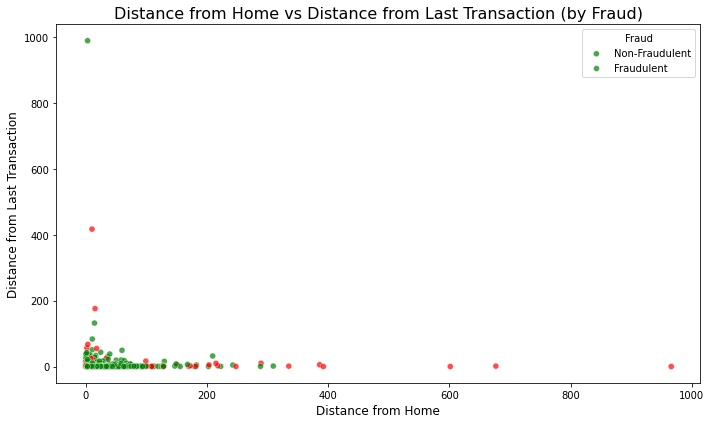

In [11]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, 
                x='distance_from_home', 
                y='distance_from_last_transaction', 
                hue='fraud', 
                palette={0: 'green', 1: 'red'}, 
                alpha=0.7)

# Set plot titles and labels
plt.title('Distance from Home vs Distance from Last Transaction (by Fraud)', fontsize=16)
plt.xlabel('Distance from Home', fontsize=12)
plt.ylabel('Distance from Last Transaction', fontsize=12)
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Show plot
plt.tight_layout()
plt.show()


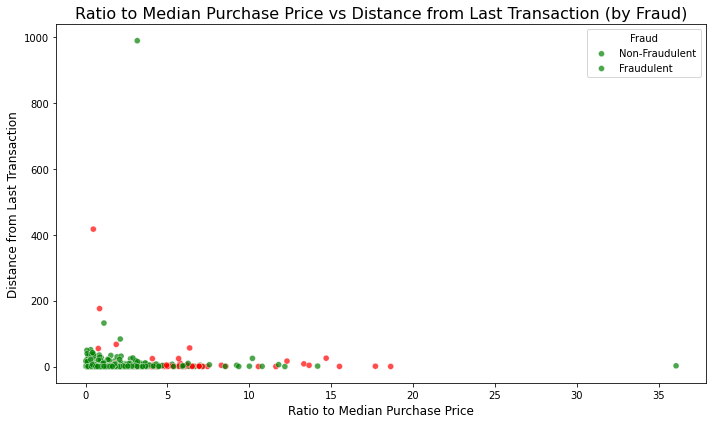

In [12]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, 
                x='ratio_to_median_purchase_price', 
                y='distance_from_last_transaction', 
                hue='fraud', 
                palette={0: 'green', 1: 'red'}, 
                alpha=0.7)

# Set plot titles and labels
plt.title('Ratio to Median Purchase Price vs Distance from Last Transaction (by Fraud)', fontsize=16)
plt.xlabel('Ratio to Median Purchase Price', fontsize=12)
plt.ylabel('Distance from Last Transaction', fontsize=12)
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Show plot
plt.tight_layout()
plt.show()


In [13]:
# Define X (features) and y (target)
X = df_cleaned.drop(columns=['fraud'])  # Drop the 'fraud' column for the features
y = df_cleaned['fraud']  # The 'fraud' column is the target variable

# Split the data into train and test sets with test size of 0.2, random state 42, and stratify by y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the test dataset
print("Test Set (X_test):")
print(X_test.head())

# Count the number of fraudulent and non-fraudulent transactions in the test set
print("\nCount of transactions in the test set:")
print(y_test.value_counts())


Test Set (X_test):
     distance_from_home  distance_from_last_transaction  \
782            0.701100                        0.540487   
51            43.281314                        3.367793   
197            4.586564                        3.365070   
550            4.403263                        0.173726   
412          965.910612                        0.023604   

     ratio_to_median_purchase_price  repeat_retailer  used_chip  \
782                        1.754568              0.0        0.0   
51                         0.676058              1.0        1.0   
197                        2.454288              1.0        0.0   
550                        0.641169              1.0        0.0   
412                        0.257908              1.0        0.0   

     used_pin_number  online_order  
782              0.0           1.0  
51               1.0           1.0  
197              0.0           0.0  
550              0.0           0.0  
412              0.0           1.0  



In [14]:
# Create a "no fraud" model by predicting 0 (non-fraudulent) for all test samples
no_fraud_predictions = [0] * len(y_test)

# Display the first 100 rows of the predictions
print(no_fraud_predictions[:100])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
# Create a KNeighborsClassifier with 3 nearest neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn.predict(X_test)

# Print the first 100 rows of the predictions
print(knn_predictions[:100])


[0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


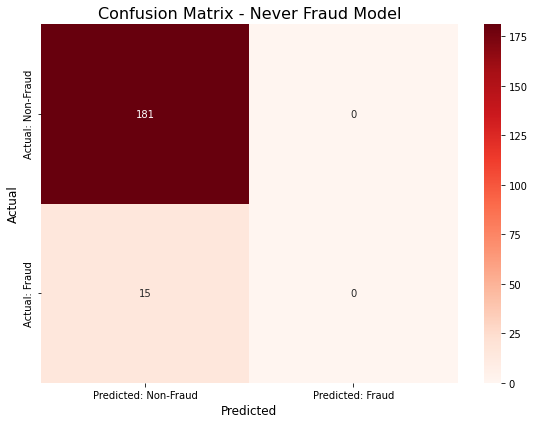

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       181
           1       0.00      0.00      0.00        15

    accuracy                           0.92       196
   macro avg       0.46      0.50      0.48       196
weighted avg       0.85      0.92      0.89       196



/home/jupyter-lstone/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jupyter-lstone/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jupyter-lstone/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
# Create confusion matrix for the "no fraud" model
cm_no_fraud = confusion_matrix(y_test, no_fraud_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_no_fraud, annot=True, fmt='d', cmap='Reds', cbar=True, 
            xticklabels=['Predicted: Non-Fraud', 'Predicted: Fraud'],
            yticklabels=['Actual: Non-Fraud', 'Actual: Fraud'])

# Add titles and labels
plt.title('Confusion Matrix - Never Fraud Model', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Print classification report for the "no fraud" model
print(classification_report(y_test, no_fraud_predictions))


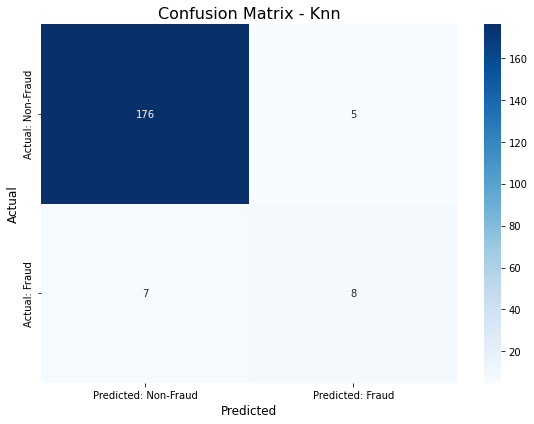

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       181
           1       0.62      0.53      0.57        15

    accuracy                           0.94       196
   macro avg       0.79      0.75      0.77       196
weighted avg       0.94      0.94      0.94       196



In [17]:
# Create confusion matrix for the KNN model
cm_knn = confusion_matrix(y_test, knn_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=['Predicted: Non-Fraud', 'Predicted: Fraud'],
            yticklabels=['Actual: Non-Fraud', 'Actual: Fraud'])

# Add titles and labels
plt.title('Confusion Matrix - Knn', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Print classification report for the KNN model
print(classification_report(y_test, knn_predictions))


/home/jupyter-lstone/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


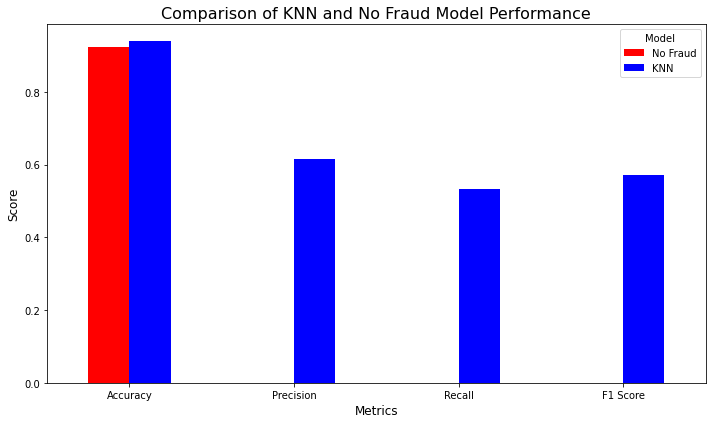

In [18]:
# Calculate metrics for the "No Fraud" model
accuracy_no_fraud = accuracy_score(y_test, no_fraud_predictions)
precision_no_fraud = precision_score(y_test, no_fraud_predictions)
recall_no_fraud = recall_score(y_test, no_fraud_predictions)
f1_no_fraud = f1_score(y_test, no_fraud_predictions)

# Calculate metrics for the KNN model
accuracy_knn = accuracy_score(y_test, knn_predictions)
precision_knn = precision_score(y_test, knn_predictions)
recall_knn = recall_score(y_test, knn_predictions)
f1_knn = f1_score(y_test, knn_predictions)

# Create a DataFrame for the comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
no_fraud_scores = [accuracy_no_fraud, precision_no_fraud, recall_no_fraud, f1_no_fraud]
knn_scores = [accuracy_knn, precision_knn, recall_knn, f1_knn]

df_comparison = pd.DataFrame({
    'Metrics': metrics,
    'No Fraud': no_fraud_scores,
    'KNN': knn_scores
})

# Plot the bar chart
df_comparison.set_index('Metrics').plot(kind='bar', figsize=(10, 6), color=['red', 'blue'])

# Title and labels
plt.title('Comparison of KNN and No Fraud Model Performance', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Model', labels=['No Fraud', 'KNN'])
plt.tight_layout()
plt.show()
